# Triangle Counting

In [35]:
from pygraphblas import *
from pygraphblas.gviz import *

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

In [40]:
rows = [0, 0, 1, 1, 1, 2, 2, 3, 3, 3, 4, 4, 5, 5]
cols = [1, 2, 0, 2, 3, 0, 1, 1, 4, 5, 3, 5, 3, 4]
vals = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

M = Matrix.from_lists(rows, cols, vals, nrows=6, ncols=6)

In [41]:
M

0,,1,1,,,
1,1,,1,1,,
2,1,1,,,,
3,,1,,,1,1
4,,,,1,,1
5,,,,1,1,


In [71]:
def draw_graph(M, seed=3):
    G = nx.Graph()
    for i, j, val in M:
        if val != 0 and i != j:
            G.add_edge(i, j)
    
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G, k=1.5, seed=seed)
    
    nx.draw(G, pos,
            with_labels=True,
            node_size=700,
            node_color='skyblue',
            edgecolors='black',
            linewidths=1,
            font_size=14,
            font_weight='bold',
            width=2,
            alpha=0.8)
    
    return G

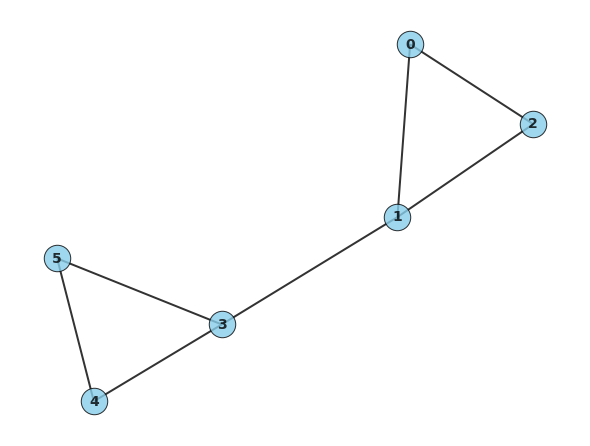

In [72]:
G = draw_graph(M, seed=3)

In [65]:
def sandia(A, L):
    return L.mxm(L, mask=L)

In [66]:
S = sandia(M, M.tril())

print(S.reduce_int())

2


In [67]:
%timeit sandia(M, M.tril())

13 µs ± 159 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


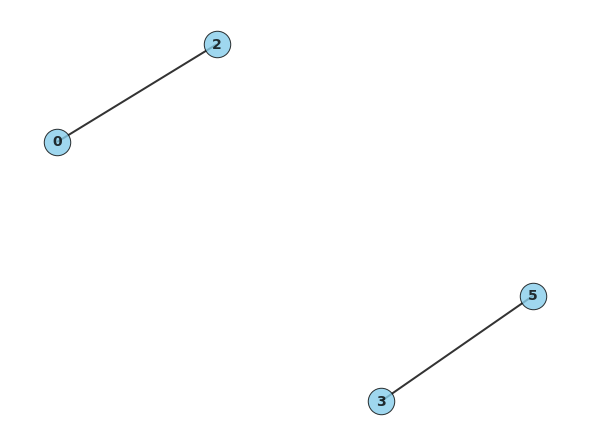

In [73]:
G = draw_graph(S, seed=3)

In [74]:
def burkhardt(matrix):
    A = matrix
    
    A_squared = A.mxm(A)
    triangles_matrix = A_squared * A
    triangle_count = triangles_matrix.nvals // 6
    
    return triangle_count, triangles_matrix


In [75]:
count1, B = burkhardt(M)
print(count1)

2


In [76]:
%timeit cohen(M, M.triu(), M.tril())

20.9 µs ± 288 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


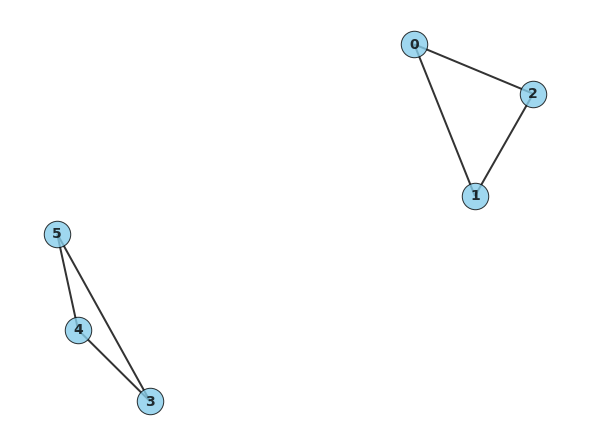

In [79]:
G = draw_graph(B, seed=3)